# PTDLUD#3 - ĐỒ ÁN THỰC HÀNH 2

19120148 - Lê Huỳnh Minh Tuấn

19120341 - Phạm Nhựt Quang

19120687 - Ngô Quốc Toại

19120692 - Phạm Minh Trí


# Mục tiêu: Tìm ra model dự đoán giá airbnb tốt nhất

# EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/lhminhtuan2000/PTDLUD_DATH_2/main/airbnb-listings_new-york.csv", sep=';', low_memory=False)
df.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,13494898,https://www.airbnb.com/rooms/13494898,20170502132028,2017-05-04,Modern 1BR apartment amazing location in Chelsea,This modern apartment is full of New York char...,NaN,This modern apartment is full of New York char...,none,NaN,...,10.0,10.0,10.0,NaN,NaN,flexible,1,0.29,"40.74032236139562,-74.00264894520818","Host Has Profile Pic,Is Location Exact"
1,7859723,https://www.airbnb.com/rooms/7859723,20170502132028,2017-05-04,Spacious Studio in Chelsea,Large and very clean studio on a beautiful tre...,NaN,Large and very clean studio on a beautiful tre...,none,NaN,...,10.0,10.0,10.0,NaN,NaN,strict,1,0.60,"40.74452858803597,-73.9998811278712","Host Has Profile Pic,Host Identity Verified,Is..."
2,137558,https://www.airbnb.com/rooms/137558,20170502132028,2017-05-05,MINIMALIST APT. HIGH-LINE AREA,NaN,This is the most charming place in the area. T...,This is the most charming place in the area. T...,none,NaN,...,10.0,10.0,9.0,NaN,NaN,strict,1,0.20,"40.752836564513,-74.0071511604528","Host Has Profile Pic,Is Location Exact"
3,3915771,https://www.airbnb.com/rooms/3915771,20170502132028,2017-05-05,Furnished Studio with Loft CHELSEA,Lovely studio apartment in the heart of Manhat...,This is an amazing studio right in the center ...,Lovely studio apartment in the heart of Manhat...,none,"Chelsea, for those who don't know NYC, is amaz...",...,10.0,10.0,9.0,NaN,NaN,moderate,1,0.53,"40.74461572374567,-74.00046825033714","Host Has Profile Pic,Host Identity Verified"
4,2537383,https://www.airbnb.com/rooms/2537383,20170502132028,2017-05-05,New York City - A Love Affair!,"Charming, very quaint, sunny 1 bdrm apt., 4th ...","The apartment is a REAL one bedroom, unlike ma...","Charming, very quaint, sunny 1 bdrm apt., 4th ...",none,Chelsa is one of the most sought after neighbo...,...,10.0,10.0,10.0,NaN,NaN,strict,1,0.98,"40.74122935887343,-74.0026704259246","Host Has Profile Pic,Host Identity Verified,Is..."


In [ ]:
df.shape

(19528, 89)

In [ ]:
# Kiểm tra unique ID
if len(df['ID'].unique()) == len(df):
    print('ID is unique')
else: 
    print('ID is not unique')

ID is unique


## Loại bỏ những column không cần thiết

In [ ]:
# Xem thông tin các column
pd.DataFrame({
    'Column': df.columns,
    'Dtype': df.dtypes.values,
    'Null count': df.isnull().sum().values,
    'Null percent (%)': df.isnull().sum().values / len(df) * 100
}).sort_values(by='Null percent (%)', ascending=False)

,Column,Dtype,Null count,Null percent (%)
66,Has Availability,float64,19528,100.000000
82,License,float64,19528,100.000000
27,Host Acceptance Rate,float64,19528,100.000000
83,Jurisdiction Names,object,19527,99.994879
55,Square Feet,float64,19275,98.704424
...,...,...,...,...
49,Accommodates,int64,0,0.000000
53,Bed Type,object,0,0.000000
61,Guests Included,int64,0,0.000000
62,Extra People,int64,0,0.000000


### Loại bỏ column quá nhiều giá trị null (> 15%)

In [ ]:
# Check các column có quá nhiều giá trị null (> 15%)
info = pd.DataFrame({
    'Column': df.columns,
    'Dtype': df.dtypes.values,
    'Null count': df.isnull().sum().values,
    'Null percent (%)': df.isnull().sum().values / len(df) * 100
}).sort_values(by='Null percent (%)', ascending=False)

info[info['Null percent (%)'] > 15]

,Column,Dtype,Null count,Null percent (%)
66,Has Availability,float64,19528,100.000000
82,License,float64,19528,100.000000
27,Host Acceptance Rate,float64,19528,100.000000
83,Jurisdiction Names,object,19527,99.994879
55,Square Feet,float64,19275,98.704424
57,Weekly Price,float64,17277,88.472962
58,Monthly Price,float64,16327,83.608152
10,Notes,object,12848,65.792708
59,Security Deposit,float64,11378,58.265055
13,Interaction,object,9364,47.951659


In [ ]:
# Drop các column quá nhiều giá trị null ở trên
df.drop(columns=info[info['Null percent (%)'] > 15]['Column'].values, inplace=True)

### Drop các column ID, Code, văn bản không có giá trị thống kê. 

In [ ]:
df.drop(
    columns=[
        "ID",
        "Scrape ID",
        "Host ID",
        "Listing Url",
        "Picture Url",
        "Host Picture Url",
        "Host Thumbnail Url",
        "Host URL",
        "Name",
        "Summary",
        "Description",
        "Experiences Offered",
        "Host Name",
        "Host Location",
        "Host Neighbourhood",
        "Host Verifications",
        "Street",
        "Zipcode",
        "Market",
        "Smart Location",
        "Country Code",
        "Amenities",
        "Geolocation",
        "Features",
        "Calendar Updated",
        "Host Listings Count",
        "Host Total Listings Count",
        "Latitude",
        "Longitude",
        "Availability 60",
        "State",
        "Availability 90",
        "Calculated host listings count",
        "Neighbourhood Group Cleansed",
    ],
    inplace=True,
)


In [ ]:
# Do tập dữ liệu này thuộc City New York nên City và Country là không cần thiết
df.drop(columns=["Country", "City"], inplace=True)

In [ ]:
info = pd.DataFrame({
    'Column': df.columns,
    'Dtype': df.dtypes.values,
    'Null count': df.isnull().sum().values,
    'Null percent (%)': df.isnull().sum().values / len(df) * 100
})
info

,Column,Dtype,Null count,Null percent (%)
0,Last Scraped,object,0,0.000000
1,Host Since,object,109,0.558173
2,Neighbourhood Cleansed,object,0,0.000000
3,Property Type,object,0,0.000000
4,Room Type,object,0,0.000000
5,Accommodates,int64,0,0.000000
6,Bathrooms,float64,74,0.378943
7,Bedrooms,float64,27,0.138263
8,Beds,float64,45,0.230438
9,Bed Type,object,0,0.000000


### Dùng RFE (Backward Elimination) và OLS để loại bỏ những column không cần thiết

In [ ]:
# Các hàm hỗ trợ

import statsmodels.api as sm

# Trả về tập dữ liệu không có giá trị null (loại bỏ các dòng có giá trị null)
def get_not_null_data(data):
    cols_have_null = data.columns[data.isnull().sum() != 0].values
    
    data_no_null = data
    
    for col in cols_have_null:
        data_no_null = data_no_null[data_no_null[col].notnull()]
    
    return data_no_null


def get_ols_result(data):
    
    # Lấy những column là numeric, khác Price
    cols = data.select_dtypes(include=np.number).columns.tolist()
    cols.remove("Price")

    # Lấy tập dữ liệu không NULL
    df_not_null = get_not_null_data(data)

    y = df_not_null["Price"]
    x = df_not_null[cols]

    ols_model = sm.OLS(y, x)
    result = ols_model.fit()
    return result


def get_best_rfe_selector(x, y):
    rsquared_adj_max = 0
    n_cols = len(x.columns)
    # Sử dụng lasso làm model đánh giá
    lasso_model = Lasso(alpha = 1)

    # Vì RFE không thể xác định lấy bao nhiêu column là tốt nhất. Nên mình sẽ 
    # dùng vòng for để xem lấy bao nhiêu column là tốt nhất (thông qua OLS 
    # R-Squared Adj)
    print('n\t', 'R-Squared Adj')
    print('-----------------------------------')
    for i in range(1, n_cols + 1):
        selector = RFE(lasso_model, n_features_to_select=i, step=1)
        selector.fit(x, y)
        x_selected = selector.transform(x)
        
        # Dùng OLS để tính R-Square Adj
        ols_model = sm.OLS(y, x_selected)
        result = ols_model.fit()
        print(i, '\t', result.rsquared_adj)
        if result.rsquared_adj > rsquared_adj_max:
            rsquared_adj_max = result.rsquared_adj
            best_selector = selector

    return best_selector


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso

# Lấy những column là numeric, khác Price
cols = df.select_dtypes(include=np.number).columns.tolist()
cols.remove("Price")

# Lấy tập dữ liệu không NULL
df_not_null = get_not_null_data(df)

y = df_not_null["Price"]
x = df_not_null[cols]


In [ ]:
best_selector = get_best_rfe_selector(x, y)

n	 R-Squared Adj
-----------------------------------
1 	 0.7032919375329365
2 	 0.7869201000631078
3 	 0.7876635602499922
4 	 0.7877297875430762
5 	 0.7897458338132062
6 	 0.7897349534986204
7 	 0.7912931536795408
8 	 0.7913226290441706
9 	 0.791312101399514
10 	 0.7913741721368723
11 	 0.7913653936054519


Vậy tốt nhất là 10 column

In [ ]:
# Column cần loại bỏ là
x.columns[~best_selector.support_].tolist()

['Maximum Nights']

In [ ]:
# Drop column Maximum Nights
df.drop(columns='Maximum Nights', inplace=True)

In [ ]:
# Check lại bằng OLS
result = get_ols_result(df)
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.791
Model:                            OLS   Adj. R-squared (uncentered):              0.791
Method:                 Least Squares   F-statistic:                              7269.
Date:                Thu, 05 Jan 2023   Prob (F-statistic):                        0.00
Time:                        06:52:17   Log-Likelihood:                     -1.1428e+05
No. Observations:               19159   AIC:                                  2.286e+05
Df Residuals:                   19149   BIC:                                  2.287e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

Ta thấy Minimum Nights và Guest Included có p-value rất cao. Rất có thể chúng không liên quan đên giá trị Price.

=> Ta drop 2 column trên

In [ ]:
df.drop(columns=['Guests Included', 'Minimum Nights'], inplace=True)

In [ ]:
# Check lại bằng OLS
result = get_ols_result(df)
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.791
Model:                            OLS   Adj. R-squared (uncentered):              0.791
Method:                 Least Squares   F-statistic:                              9086.
Date:                Thu, 05 Jan 2023   Prob (F-statistic):                        0.00
Time:                        06:52:17   Log-Likelihood:                     -1.1428e+05
No. Observations:               19159   AIC:                                  2.286e+05
Df Residuals:                   19151   BIC:                                  2.286e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [ ]:
# Check lại R-Squared Adj
result.rsquared_adj

0.7913849354157992

Cao hơn R-Squared Adj với 10 feature (0.7913741721368723) 

In [ ]:
# Các column còn lại
pd.DataFrame({
    'Column': df.columns,
    'Dtype': df.dtypes.values,
    'Null count': df.isnull().sum().values,
    'Null percent (%)': df.isnull().sum().values / len(df) * 100
})

,Column,Dtype,Null count,Null percent (%)
0,Last Scraped,object,0,0.000000
1,Host Since,object,109,0.558173
2,Neighbourhood Cleansed,object,0,0.000000
3,Property Type,object,0,0.000000
4,Room Type,object,0,0.000000
5,Accommodates,int64,0,0.000000
6,Bathrooms,float64,74,0.378943
7,Bedrooms,float64,27,0.138263
8,Beds,float64,45,0.230438
9,Bed Type,object,0,0.000000


## Phân tích từng column

### Các hàm hỗ trợ

In [ ]:
# Lấy thông tin column: Tên column, data type, null count, phần trăm null
def get_column_info(data, column_name):
    return pd.DataFrame({
      'Column': [column_name],
      'Dtype': data[[column_name]].dtypes.values,
      'Null count': data[[column_name]].isnull().sum().values,
      'Null percent (%)': data[[column_name]].isnull().sum().values / len(data) * 100,
    })

In [ ]:
# Vẽ biểu đồ
def bar_plot_object(value_counts, width, height, barh_height):
    x = list(value_counts.keys())
    y = list(value_counts.values)

    f = plt.figure()
    f.set_figwidth(width)
    f.set_figheight(height)
    plt.barh(x, y, height=barh_height)

def explore_col(data, column_name, width=6, height=6, barh_height=0.8):
    value_counts = data[column_name].value_counts().sort_index()
    bar_plot_object(value_counts, width, height, barh_height)
    
    print(
        len(value_counts) if len(value_counts) < 5 else 5,
        "giá trị xuất hện nhiều nhất:",
        value_counts.head().index.tolist(),
        "\n",
    )


In [ ]:
# Show density cho các dữ liệu liên tục
def plt_density(column, width=6, height=6,title=None):
    if title==None:
      title=column
    plt.figure(figsize = (width, height))
    sns.distplot(df[column])
    plt.title(title)
    plt.show()

In [ ]:
# Convert column dựa trên mean price của từng giá trị
def convert_categorical_to_numeric_by_price_mean(data, column_name):
    # Lấy ra các giá trị trong column
    values = data[~data[column_name].isnull()][column_name].unique()
    values.sort()
    # Tính mean Price của từng giá trị
    price_means = [data[data[column_name] == value]["Price"].mean() for value in values]

    result = pd.DataFrame({"value": values, "price mean": price_means})

    # Sắp xếp mean price theo giá trị tăng dần
    result.sort_values("price mean", inplace=True)

    # Lấy value dưới dạng một set
    value_set = set(result["value"].values)

    
    data[column_name] = data[column_name].apply(
        lambda value: result[result["value"] == value]["price mean"].tolist()[0]
        if value in value_set
        else None
    )


In [ ]:
import datetime
from dateutil import parser


# Convert date column thành numeric column (Ngày X Được tính bằng số ngày từ 1970-1-1, missing value được đánh dấu là 0)
def convert_date_to_numeric(date_str):
    if date_str.upper() != "NAN":
        return int(str(
            parser.parse(date_str) - parser.parse("1970-1-1")
        ).split(" ")[0])
    else:
        return None


def convert_date_col_to_numeric(data, column_name):
    data[column_name] = data[column_name].apply(lambda x: convert_date_to_numeric(str(x)))

### Xem xét: Last Scraped

In [ ]:
df['Last Scraped'].value_counts()

2017-05-04    8205
2017-05-03    7964
2017-05-05    2375
2017-05-02     984
Name: Last Scraped, dtype: int64

4 giá trị xuất hện nhiều nhất: ['2017-05-02', '2017-05-03', '2017-05-04', '2017-05-05'] 



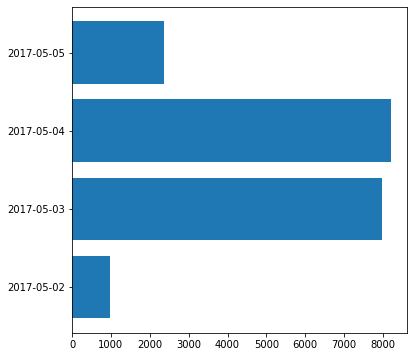

In [ ]:
explore_col(df, 'Last Scraped')

In [ ]:
# Check missing value
get_column_info(df, 'Last Scraped')

,Column,Dtype,Null count,Null percent (%)
0,Last Scraped,object,0,0.0


In [ ]:
# Convert thành numeric
convert_date_col_to_numeric(df, 'Last Scraped')

### Xem xét: Host Since

In [ ]:
df['Host Since'].value_counts()

2015-12-21    47
2014-08-05    32
2014-06-11    32
2015-11-11    31
2015-06-11    30
              ..
2010-06-10     1
2010-08-14     1
2010-01-13     1
2009-08-10     1
2010-09-01     1
Name: Host Since, Length: 2628, dtype: int64

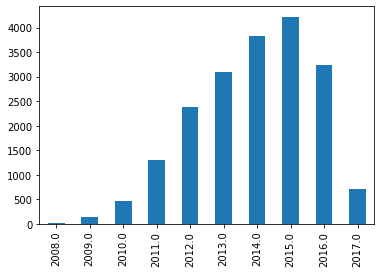

In [ ]:
# Phân bố host since theo các năm
years =  pd.to_datetime(df['Host Since'], format='%Y-%m-%d', errors='coerce').dt.year
years.value_counts().sort_index().plot.bar()

=> Dữ liệu phân bố chuẩn, lệch phải. Host Since tập trung nhiều ở năm 2015

In [ ]:
# Check missing value
get_column_info(df, 'Host Since')

,Column,Dtype,Null count,Null percent (%)
0,Host Since,object,109,0.558173


In [ ]:
convert_date_col_to_numeric(df, 'Host Since')

### Xem xét: Neighbourhood Cleansed 	

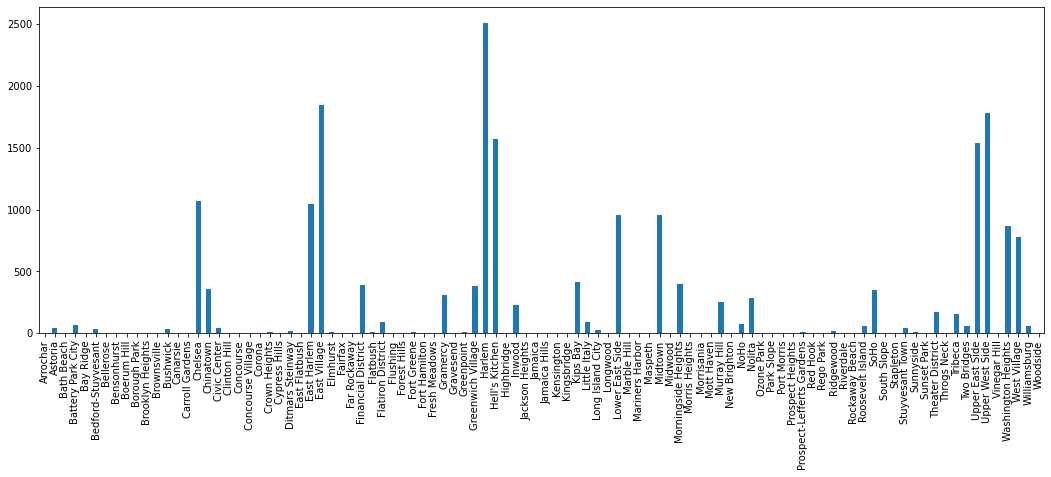

In [ ]:
# Biểu đồ phân bố giá trị
f = plt.figure()
f.set_figwidth(18)
f.set_figheight(6)
neighbourhood_value_counts = df['Neighbourhood Cleansed'].value_counts().sort_index()
neighbourhood_value_counts.plot.bar()

=> Harlem nhiều nhất, tiếp đến là Upper West Side và East Village. Có nhiều Neighbourhood có sự phân bố rất ít

In [ ]:
# Check missing value
get_column_info(df, 'Neighbourhood Cleansed')

,Column,Dtype,Null count,Null percent (%)
0,Neighbourhood Cleansed,object,0,0.0


In [ ]:
convert_categorical_to_numeric_by_price_mean(df, 'Neighbourhood Cleansed')

### Xem xét: Property Type 	

In [ ]:
df['Property Type'].describe()

count         19528
unique           22
top       Apartment
freq          18331
Name: Property Type, dtype: object

5 giá trị xuất hện nhiều nhất: ['Apartment', 'Bed & Breakfast', 'Boat', 'Boutique hotel', 'Bungalow'] 



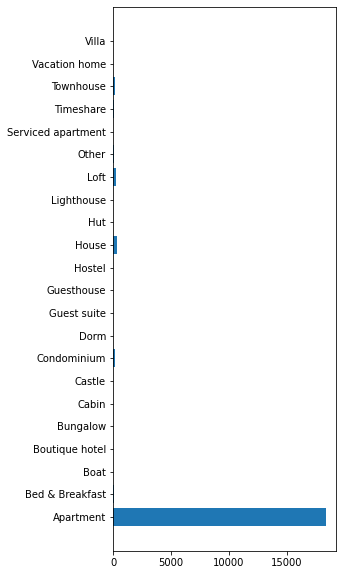

In [ ]:
explore_col(df, 'Property Type', 4, 10)

=> Chủ yếu là department

In [ ]:
# Check missing value
get_column_info(df, 'Property Type')


,Column,Dtype,Null count,Null percent (%)
0,Property Type,object,0,0.0


In [ ]:
convert_categorical_to_numeric_by_price_mean(df, 'Property Type')

### Xem xét: Room Type

In [ ]:
df['Room Type'].describe()

count               19528
unique                  3
top       Entire home/apt
freq                10934
Name: Room Type, dtype: object

3 giá trị xuất hện nhiều nhất: ['Entire home/apt', 'Private room', 'Shared room'] 



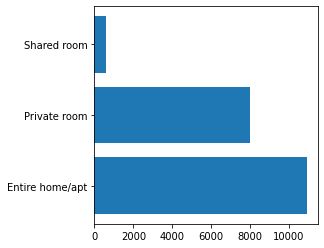

In [ ]:
explore_col(df, 'Room Type', 4, 4)

In [ ]:
# Check missing value
get_column_info(df, 'Room Type')

,Column,Dtype,Null count,Null percent (%)
0,Room Type,object,0,0.0


In [ ]:
convert_categorical_to_numeric_by_price_mean(df, 'Room Type')

### Xem xét: Accommodates

In [ ]:
df['Accommodates'].value_counts().sort_index()

1     2760
2     9302
3     2288
4     2916
5      718
6      871
7      166
8      268
9       49
10     102
11       7
12      42
13       5
14       7
15       4
16      23
Name: Accommodates, dtype: int64

5 giá trị xuất hện nhiều nhất: [1, 2, 3, 4, 5] 



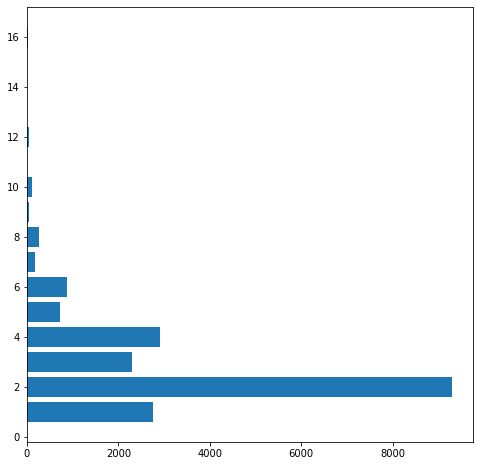

In [ ]:
explore_col(df, 'Accommodates', 8, 8)

Accommodate phân bố từ 1 - 16, chủ yếu tập trung ở các giá trị 1 - 4. Khá dễ hiểu vì đây các nơi cho thuê thường sẽ có sức chứa 1 - 4 người.

In [ ]:
# Check missing value
get_column_info(df, 'Accommodates')

,Column,Dtype,Null count,Null percent (%)
0,Accommodates,int64,0,0.0


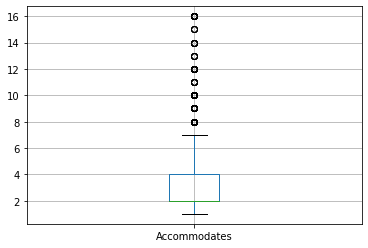

In [ ]:
# Check outliser
df[['Accommodates']].boxplot()

Accommodates 16 là có thể => không cần drop

### Xem xét: Bathrooms

5 giá trị xuất hện nhiều nhất: [0.0, 0.5, 1.0, 1.5, 2.0] 



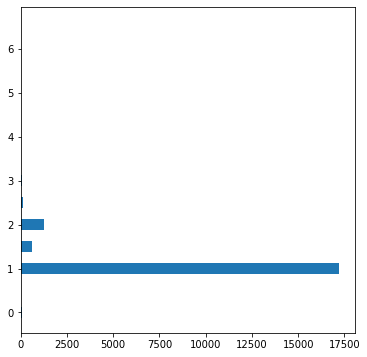

In [ ]:
explore_col(df, 'Bathrooms', 6, 6, 0.25)

Các dự liệu không phải số nguyên => Dữ liệu bị dơ

5 giá trị xuất hện nhiều nhất: [0.0, 1.0, 2.0, 3.0, 4.0] 



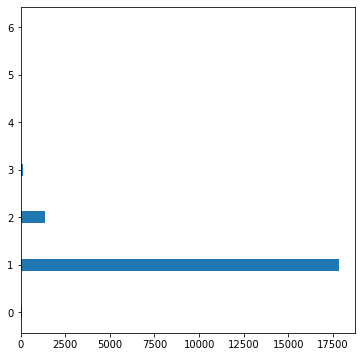

In [ ]:
# Làm sạch lại bằng cách làm tròn lên
df['Bathrooms'] = np.floor(df['Bathrooms'])
explore_col(df, 'Bathrooms', 6, 6, 0.25)


Chủ yếu là 1 bathroom, tiếp đến là 2

In [ ]:
# Check missing value
get_column_info(df, 'Bathrooms')

,Column,Dtype,Null count,Null percent (%)
0,Bathrooms,float64,74,0.378943


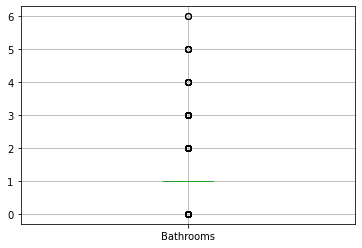

In [ ]:
# Check outlier
df[['Bathrooms']].boxplot()

Ít outlier và 6 bathroom cũng có thể có => không drop

### Xem xét: Bedrooms

In [ ]:
df['Bedrooms'].value_counts()

1.0    13981
0.0     2368
2.0     2350
3.0      606
4.0      157
5.0       28
6.0       11
Name: Bedrooms, dtype: int64

5 giá trị xuất hện nhiều nhất: [0.0, 1.0, 2.0, 3.0, 4.0] 



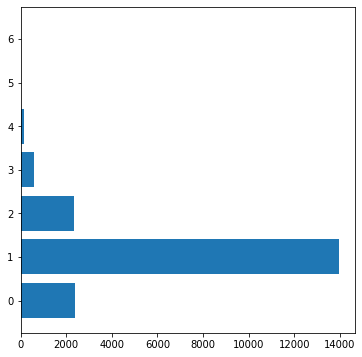

In [ ]:
explore_col(df, 'Bedrooms', 6, 6)

=> Dữ liệu phân bố từ 0 - 6. Chủ yếu tập trung ở 0 - 2

In [ ]:
get_column_info(df, 'Bedrooms')

,Column,Dtype,Null count,Null percent (%)
0,Bedrooms,float64,27,0.138263


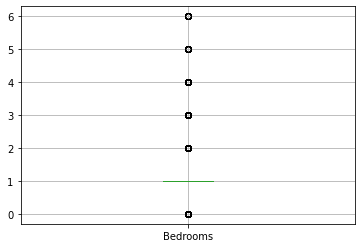

In [ ]:
# Check outlier
df[['Bedrooms']].boxplot()

0 - 5 Bedrooms là có thể có => không drop

### Xem xét: Beds

In [ ]:
df['Beds'].value_counts()

1.0     13258
2.0      4065
3.0      1298
4.0       516
5.0       190
6.0       101
7.0        25
8.0        15
9.0         9
10.0        2
14.0        2
11.0        1
12.0        1
Name: Beds, dtype: int64

5 giá trị xuất hện nhiều nhất: [1.0, 2.0, 3.0, 4.0, 5.0] 



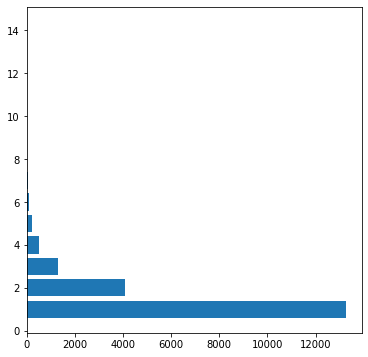

In [ ]:
explore_col(df, 'Beds', 6, 6)

=> Dữ liệu tập trung nhiều từ 1 đén 3, nhiều nhất ở 1.

In [ ]:
# Check missing value
get_column_info(df, 'Beds')

,Column,Dtype,Null count,Null percent (%)
0,Beds,float64,45,0.230438


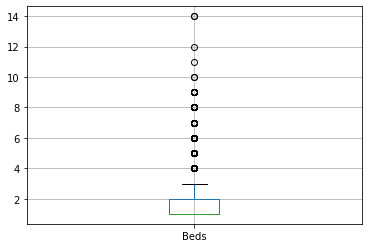

In [ ]:
# Check outlier
df[['Beds']].boxplot()

12 Bed là có thể có (vd ký túc xá) và các outlier cũng không quá rời rạc => không drop

### Xem xét: Bed Type 

In [ ]:
df['Bed Type'].value_counts()

Real Bed         18922
Pull-out Sofa      209
Futon              191
Airbed             137
Couch               69
Name: Bed Type, dtype: int64

5 giá trị xuất hện nhiều nhất: ['Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed'] 



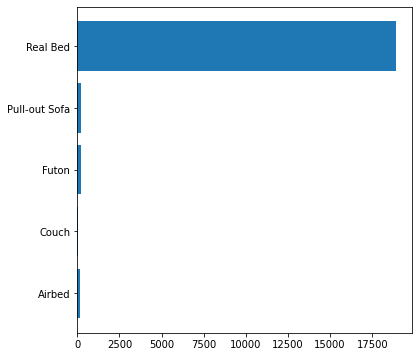

In [ ]:
explore_col(df, 'Bed Type')

=> Chủ yếu là Real Bed

In [ ]:
# Check missing value
get_column_info(df, 'Bed Type')

,Column,Dtype,Null count,Null percent (%)
0,Bed Type,object,0,0.0


In [ ]:
convert_categorical_to_numeric_by_price_mean(df, 'Bed Type')

### Xem xét: Price

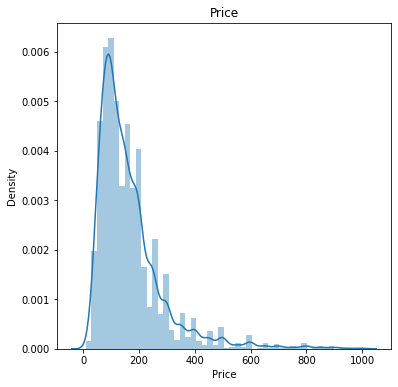

In [ ]:
plt_density('Price')

=> Ta thấy dữ liệu phân bố theo hình chuông. Bị lệch trái => Giá phỏng rẽ chiếm đa số

In [ ]:
# Check outlier
get_column_info(df, 'Price')

,Column,Dtype,Null count,Null percent (%)
0,Price,float64,144,0.737403


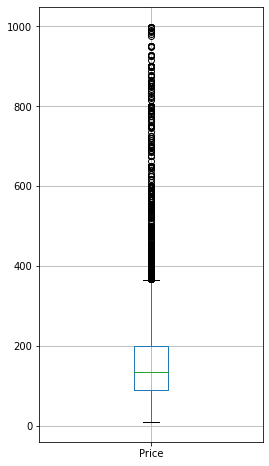

In [ ]:
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(8)
df[['Price']].boxplot()

Price 1000 trở xuống là có thể có => không cần drop

### Xem xét: Cancellation Policy

4 giá trị xuất hện nhiều nhất: ['flexible', 'moderate', 'strict', 'super_strict_30'] 



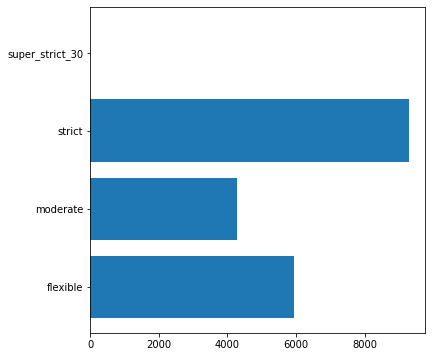

In [ ]:
explore_col(df, 'Cancellation Policy')

In [ ]:
# Check missing value
get_column_info(df, 'Cancellation Policy')

,Column,Dtype,Null count,Null percent (%)
0,Cancellation Policy,object,0,0.0


In [ ]:
convert_categorical_to_numeric_by_price_mean(df, 'Cancellation Policy')

### Calendar last Scraped

In [ ]:
df['Calendar last Scraped'].value_counts()

2017-05-03    10551
2017-05-04     5618
2017-05-05     2375
2017-05-02      984
Name: Calendar last Scraped, dtype: int64

4 giá trị xuất hện nhiều nhất: ['2017-05-02', '2017-05-03', '2017-05-04', '2017-05-05'] 



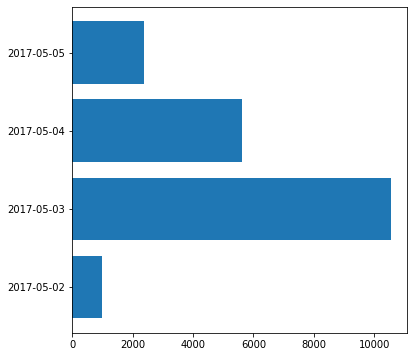

In [ ]:
explore_col(df, 'Calendar last Scraped')

In [ ]:
get_column_info(df, 'Calendar last Scraped')

,Column,Dtype,Null count,Null percent (%)
0,Calendar last Scraped,object,0,0.0


In [ ]:
# Convert sang numeric
convert_categorical_to_numeric_by_price_mean(df, 'Calendar last Scraped')

### Xem xét: Availability 30

In [ ]:
df['Availability 30'].value_counts()

0     9087
1      849
2      834
30     751
3      740
4      671
5      605
29     526
6      495
8      467
7      454
9      385
10     336
11     314
12     291
13     258
28     256
14     234
17     207
15     202
27     193
16     177
23     175
19     168
18     159
21     135
22     125
20     116
26     112
24     106
25     100
Name: Availability 30, dtype: int64

5 giá trị xuất hện nhiều nhất: [0, 1, 2, 3, 4] 



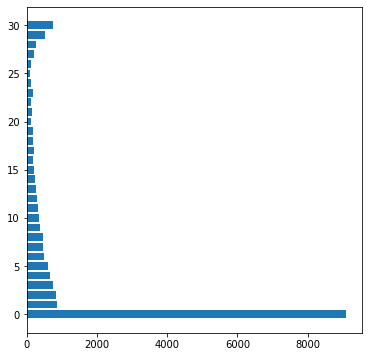

In [ ]:
explore_col(df, 'Availability 30')

Availability chủ yếu là 0. Tập trung ít ở các số khác

Giảm dần từ 1-25, tăng dần từ 25-30

In [ ]:
# Check missing value
get_column_info(df, 'Availability 30')

,Column,Dtype,Null count,Null percent (%)
0,Availability 30,int64,0,0.0


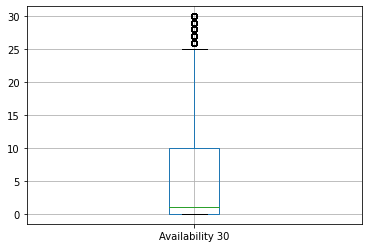

In [ ]:
# Check outlier
df[['Availability 30']].boxplot()

### Xem xét: Extra People

In [ ]:
df['Extra People'].value_counts()

0      11526
25      1480
50      1220
20      1214
10       763
       ...  
62         1
176        1
34         1
185        1
180        1
Name: Extra People, Length: 89, dtype: int64

5 giá trị xuất hện nhiều nhất: [0, 5, 7, 8, 9] 



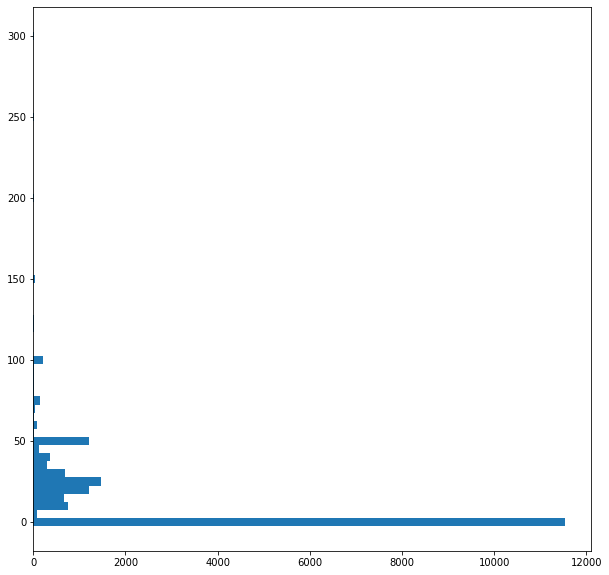

In [ ]:
explore_col(df, 'Extra People', 10, 10, 5)

Dữ liệu phân bố rộng, chủ yếu tập trung > 50, 0 Extra people là chủ yếu.

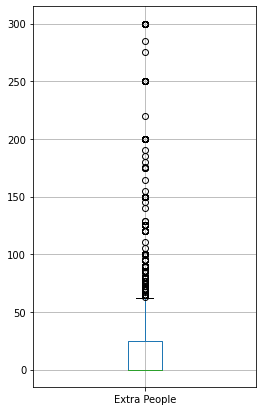

In [ ]:
plt.figure(figsize=(4, 7))
df[['Extra People']].boxplot() 

=> Các outlier > 150 khá thưa thớt và rời rạc. Ta drop các outlier > 150

In [ ]:
# Drop outlier
df = df[df['Extra People'] < 150]

### Chọn lại các column một lần nửa

Tại đây các column đã được chuyển thành numeric

Bây giờ ta sẽ lượt lại các column một lần nửa.

In [ ]:
# Các column còn lại
pd.DataFrame({
    'Column': df.columns,
    'Dtype': df.dtypes.values,
    'Null count': df.isnull().sum().values,
    'Null percent (%)': df.isnull().sum().values / len(df) * 100
})

,Column,Dtype,Null count,Null percent (%)
0,Last Scraped,int64,0,0.000000
1,Host Since,float64,109,0.560873
2,Neighbourhood Cleansed,float64,0,0.000000
3,Property Type,float64,0,0.000000
4,Room Type,float64,0,0.000000
5,Accommodates,int64,0,0.000000
6,Bathrooms,float64,74,0.380776
7,Bedrooms,float64,27,0.138932
8,Beds,float64,45,0.231553
9,Bed Type,float64,0,0.000000


In [ ]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.linear_model import Lasso

# Lấy những column là numeric, khác Price
cols = df.select_dtypes(include=np.number).columns.tolist()
cols.remove("Price")

# Lấy tập dữ liệu không NULL
df_not_null = get_not_null_data(df)

y = df_not_null["Price"]
x = df_not_null[cols]

In [ ]:
best_selector = get_best_rfe_selector(x, y)

n	 R-Squared Adj
-----------------------------------
1 	 0.7004057535266514
2 	 0.78706272833918
3 	 0.7880253221462112
4 	 0.7881145124189174
5 	 0.790117492885709
6 	 0.8035533713018002
7 	 0.8085601194289898
8 	 0.8266956872344604
9 	 0.84461742076207
10 	 0.8447195690072365
11 	 0.8493967490178558
12 	 0.8493895694472882
13 	 0.849498356027736
14 	 0.8527857144388942
15 	 0.8539595486099651
16 	 0.8540070746097185


In [ ]:
# Column cần loại bỏ là qua kiểm tra là
x.columns[~best_selector.support_].tolist()

[]

In [ ]:
# Check lại bằng OLS
result = get_ols_result(df)
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.854
Model:                            OLS   Adj. R-squared (uncentered):              0.854
Method:                 Least Squares   F-statistic:                              6973.
Date:                Thu, 05 Jan 2023   Prob (F-statistic):                        0.00
Time:                        06:53:35   Log-Likelihood:                     -1.1028e+05
No. Observations:               19070   AIC:                                  2.206e+05
Df Residuals:                   19054   BIC:                                  2.207e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

Ta thấy *Extra People* và *Calendar last Scraped* có p-value rất cao.

Vậy ta drop 2 column này

In [ ]:
df.drop(columns=['Extra People', 'Calendar last Scraped'], inplace=True)

In [ ]:
# Check lại bằng OLS
result = get_ols_result(df)
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.854
Model:                            OLS   Adj. R-squared (uncentered):              0.854
Method:                 Least Squares   F-statistic:                              7969.
Date:                Thu, 05 Jan 2023   Prob (F-statistic):                        0.00
Time:                        06:53:36   Log-Likelihood:                     -1.1028e+05
No. Observations:               19070   AIC:                                  2.206e+05
Df Residuals:                   19056   BIC:                                  2.207e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [ ]:
print(result.rsquared_adj)

0.8540061049433699


### Các column còn lại

In [ ]:
# Các column còn lại
pd.DataFrame({
    'Column': df.columns,
    'Dtype': df.dtypes.values,
    'Null count': df.isnull().sum().values,
    'Null percent (%)': df.isnull().sum().values / len(df) * 100
})

,Column,Dtype,Null count,Null percent (%)
0,Last Scraped,int64,0,0.000000
1,Host Since,float64,109,0.560873
2,Neighbourhood Cleansed,float64,0,0.000000
3,Property Type,float64,0,0.000000
4,Room Type,float64,0,0.000000
5,Accommodates,int64,0,0.000000
6,Bathrooms,float64,74,0.380776
7,Bedrooms,float64,27,0.138932
8,Beds,float64,45,0.231553
9,Bed Type,float64,0,0.000000


## Phân tích sự tương quan giữa các column với Price

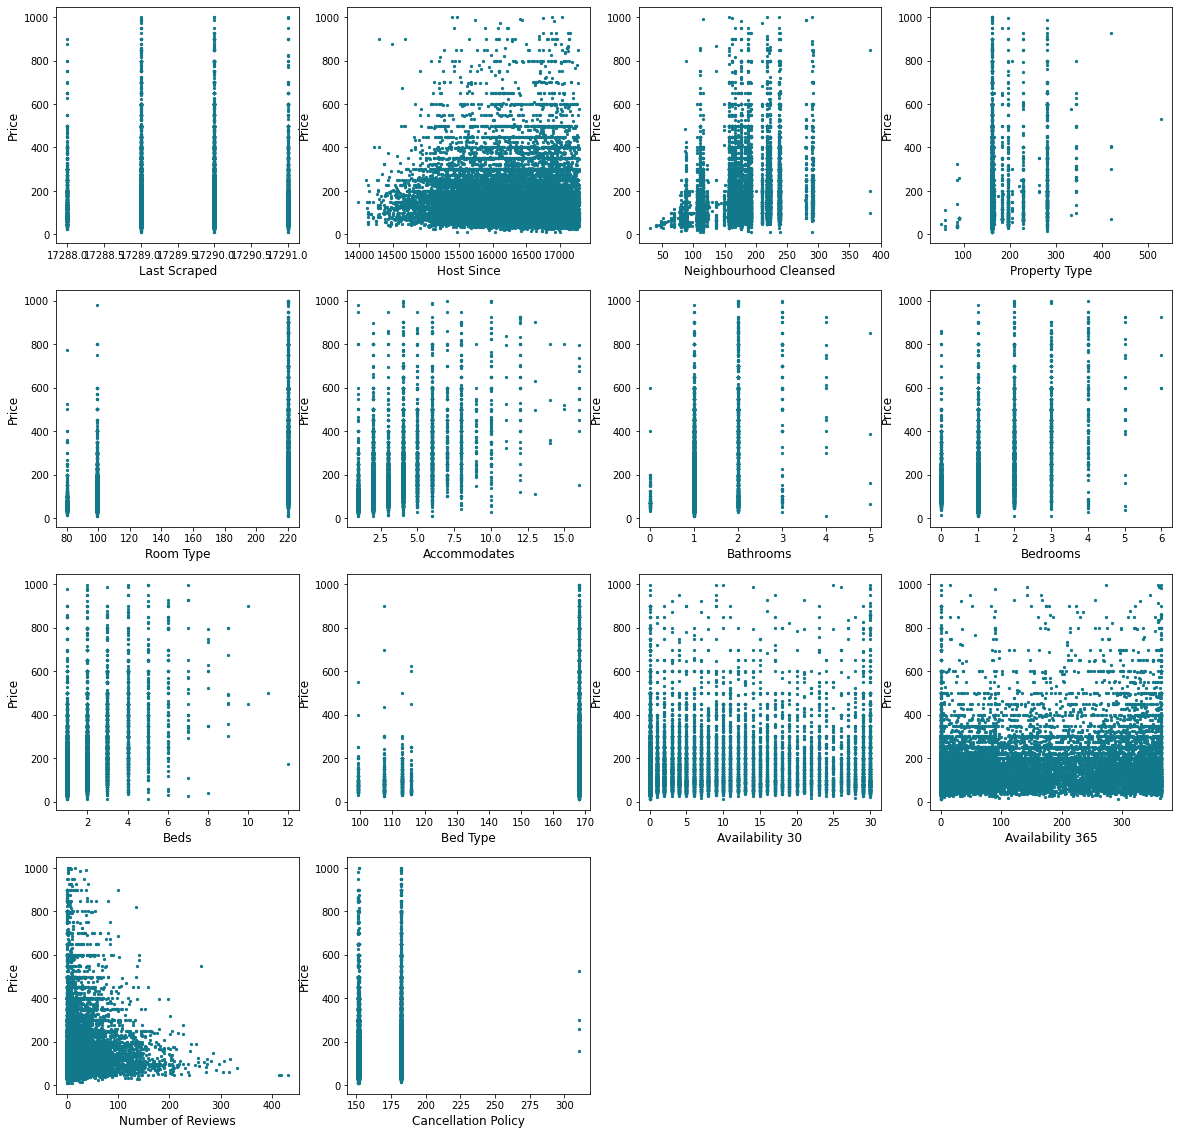

In [ ]:
fig = plt.figure(figsize = (20, 20))
cols = df.columns.tolist()
cols.remove('Price')
for i, col in enumerate(cols):
    ax = fig.add_subplot(4, 4, i + 1)
    ax.scatter(df[col], df['Price'], s=5, c='#12788b')
    ax.set_ylabel('Price', size=12)
    ax.set_xlabel(col, size=12)

Dưa vào các biểu đồ plot ở trên ta có thể thấy các column có sự liên quan với Price nhưng sự liên quan không qua cao.

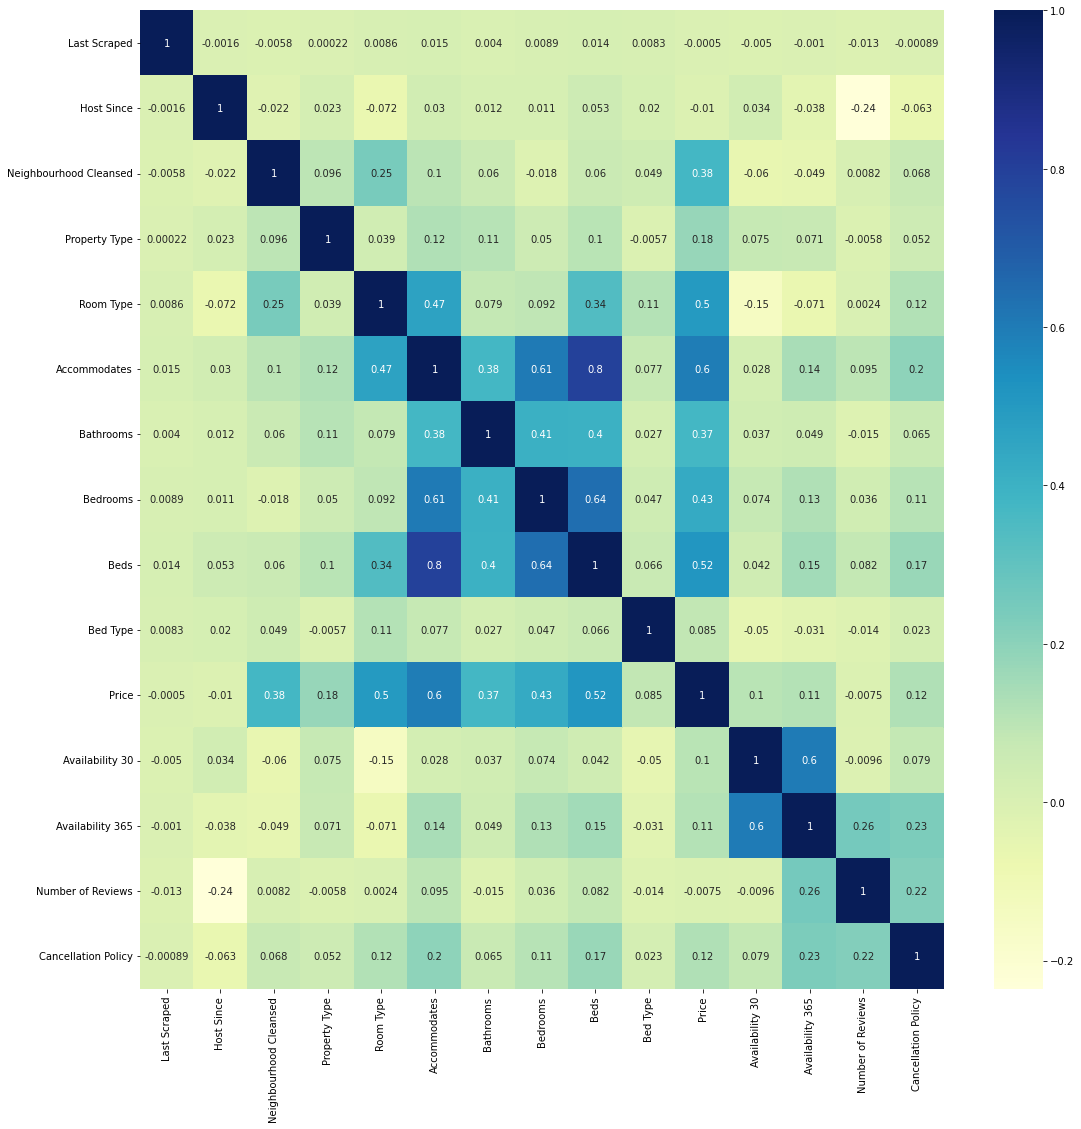

In [ ]:
fig = plt.figure(figsize = (18, 18))
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

Ta thấy các column Neighbourhood Cleansed, Room Type, Accommodates,Bathrooms, Bedrooms, Beds, Guests Included có correlation với Price khá cao (> 0.3)

# Xây dựng mô hình dự đoán giá phòng

Vì mục tiêu của chúng ta là tìm ra mô hình để dự đoán giá phòng, mà giá phòng là dữ liệu *liên tục*, nên tốt nhất là dùng mô hình hồi quy để dự đoán

Trong bài này chúng ta sẽ sử dụng mô hình **Lasso Regression** kết hợp **Cross Validation** cho mô hình hồi quy

In [ ]:
# Kiểm tra missing value
df.isnull().sum()

Last Scraped                0
Host Since                109
Neighbourhood Cleansed      0
Property Type               0
Room Type                   0
Accommodates                0
Bathrooms                  74
Bedrooms                   27
Beds                       45
Bed Type                    0
Price                     139
Availability 30             0
Availability 365            0
Number of Reviews           0
Cancellation Policy         0
dtype: int64

Ta sẽ drop các dòng có Price bằng NULL

In [ ]:
df = df.dropna(subset = ['Price'])

In [ ]:
df.isnull().sum()

Last Scraped                0
Host Since                109
Neighbourhood Cleansed      0
Property Type               0
Room Type                   0
Accommodates                0
Bathrooms                  71
Bedrooms                   27
Beds                       42
Bed Type                    0
Price                       0
Availability 30             0
Availability 365            0
Number of Reviews           0
Cancellation Policy         0
dtype: int64

Với mỗi cách fill missing value ta đánh giá model và chọn ra cách fill tốt nhất.

Cần chia dữ liệu thành 2 tập train và test. Tập chiếm 25% dataset.

In [ ]:
import sys
!pip install impyute
from impyute.imputation.cs import fast_knn
from impyute.imputation.cs import mice
sys.setrecursionlimit(100000)
def fill_by_mode(series):
    return series.mode()[0]

def fill_by_mean(series):
    return series.mean()

def fill_by_75_quantile(series):
    return series.quantile(0.75)

def fill_by_50_quantile(series):
    return series.quantile(0.5)

def fill_by_fast_knn(data_frame):
    df_fill = fast_knn(data_frame.values, k = 30)
    return pd.DataFrame(df_fill, columns= data_frame.columns.to_list())

def fill_by_mice(data_frame):
    df_fill = mice(data_frame.values)
    return pd.DataFrame(df_fill, columns= data_frame.columns.to_list())

def fill_null(data_frame, fill_function):
    cols_have_null = data_frame.columns[data_frame.isnull().sum() != 0]

    for col in cols_have_null:
        data_frame[col].fillna(fill_function(data_frame[col]), inplace=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def get_model_result(model, X, y, key):
    score = model.score(X, y)
    y_pred = model.predict(X)
    
    print("R2:", score)
    mean_squared_error = np.mean((y_pred - y) ** 2)
    print("MSE:", mean_squared_error)
    if key not in result:
        result[key] = []
    result[key].append(score)
    print()
    result[key].append(mean_squared_error)
    return score, mean_squared_error

In [ ]:
from sklearn.linear_model import LassoCV
from numpy import arange
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

result = {}

predictor_cols = df.columns.tolist()
predictor_cols.remove('Price')


x_train_have_null, x_test_have_null, y_train_have_null, y_test_have_null = train_test_split(
    df[predictor_cols], df[["Price"]], test_size=0.25
)

df_train_have_null = x_train_have_null
df_train_have_null['Price'] = y_train_have_null.values

df_test_have_null = x_test_have_null
df_test_have_null['Price'] = y_test_have_null.values
    
# CV Lasso Regression
def get_result(fill_function, key):
    if (fill_function == fill_by_fast_knn):
        df_train = fill_by_fast_knn(df_train_have_null)
        df_test = fill_by_fast_knn(df_test_have_null)
    elif (fill_function == fill_by_mice):
        df_train = fill_by_mice(df_train_have_null)
        df_test = fill_by_mice(df_test_have_null)
    else:
        df_train = df_train_have_null.copy()
        df_test = df_test_have_null.copy()

        fill_null(df_train, fill_function)
        fill_null(df_test, fill_function)

    x_train = df_train[predictor_cols]
    x_test = df_test[predictor_cols]
    y_train = df_train['Price']
    y_test = df_test['Price']

    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    lasso_cv = LassoCV(alphas=arange(0, 2, 0.01), cv=cv, n_jobs=1)
    lasso_cv.fit(x_train, y_train)

    get_model_result(lasso_cv, x_train.values, y_train.values, key)
    get_model_result(lasso_cv, x_test.values, y_test.values, key)


In [ ]:
get_result(fill_by_mode, "Mode")

R2: 0.5798999274994266
MSE: 6219.768734338418

R2: 0.5761443933508756
MSE: 6076.404279714613



In [ ]:
get_result(fill_by_mean, "Mean")

R2: 0.5799330370541751
MSE: 6219.278532629556

R2: 0.5761287826649474
MSE: 6076.628074887533



In [ ]:
print("\t75% quantile Result")
get_result(fill_by_75_quantile, "75% quantile")
print("\t50% quantile Result")
get_result(fill_by_50_quantile, "50% quantile")

	75% quantile Result
R2: 0.5799199228291476
MSE: 6219.472694573676

R2: 0.5761011938233906
MSE: 6077.023589190702

	50% quantile Result
R2: 0.579891882053953
MSE: 6219.887850743023

R2: 0.5761486425441579
MSE: 6076.343363176432



In [ ]:
get_result(fill_by_mice, "Mice")

R2: 0.5802134475294416
MSE: 6215.126930616108

R2: 0.5769889115597444
MSE: 6064.297246144297



In [ ]:
get_result(fill_by_fast_knn, "Fast_knn")

R2: 0.580153538890003
MSE: 6216.013904713205

R2: 0.5767861547722634
MSE: 6067.2039723781



In [ ]:
result

{'Mode': [0.5798999274994266,
  6219.768734338418,
  0.5761443933508756,
  6076.404279714613],
 'Mean': [0.5799330370541751,
  6219.278532629556,
  0.5761287826649474,
  6076.628074887533],
 '75% quantile': [0.5799199228291476,
  6219.472694573676,
  0.5761011938233906,
  6077.023589190702],
 '50% quantile': [0.579891882053953,
  6219.887850743023,
  0.5761486425441579,
  6076.343363176432],
 'Mice': [0.5802134475294416,
  6215.126930616108,
  0.5769889115597444,
  6064.297246144297],
 'Fast_knn': [0.580153538890003,
  6216.013904713205,
  0.5767861547722634,
  6067.2039723781]}

In [ ]:
r2_train_resutl = [result[model][0] for model in result]
r2_test_resutl = [result[model][2] for model in result]
mse_train_result = [result[model][1] for model in result]
mse_test_result = [result[model][3] for model in result]
model = [model for model in result]

In [ ]:
result_df = pd.DataFrame(
    {
        "Fill by": model,
        "R2 Train": r2_train_resutl,
        "R2 Test": r2_test_resutl,
        "MSE Train": mse_train_result,
        "MSE Test": mse_test_result,
    }
)
result_df

,Fill by,R2 Train,R2 Test,MSE Train,MSE Test
0,Mode,0.579900,0.576144,6219.768734,6076.404280
1,Mean,0.579933,0.576129,6219.278533,6076.628075
2,75% quantile,0.579920,0.576101,6219.472695,6077.023589
3,50% quantile,0.579892,0.576149,6219.887851,6076.343363
4,Mice,0.580213,0.576989,6215.126931,6064.297246
5,Fast_knn,0.580154,0.576786,6216.013905,6067.203972


Ta thấy dữ liệu được fill bằng Mice có R2 Test cao nhất và MSE Test thấp nhất. Bên cạnh đó, sự khác nhau giữa các cách fill missing không nhiều phần nhiều là do các giá trị NULL khá ít so với dataset, thuộc tính cao nhất chỉ có là 100/19000 dòng.

=> Ta sẽ chọn cách fill là Mice

In [ ]:
df_fill_mice = df.copy()
df_fill_mice = fill_by_mice(df_fill_mice)

x_train, x_test, y_train, y_test = train_test_split(
    df_fill_mice[predictor_cols], df_fill_mice[["Price"]], test_size=0.25
)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
lasso_cv = LassoCV(alphas=arange(0, 2, 0.01), cv=cv, n_jobs=1)
lasso_cv.fit(x_train, y_train)

LassoCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0...
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53,
       1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64,
       1.65, 1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75,
       1.76, 1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86,
       1.87, 1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97,
       1.98, 1.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1), n_

In [ ]:
result = get_ols_result(df_fill_mice)
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.853
Model:                            OLS   Adj. R-squared (uncentered):              0.853
Method:                 Least Squares   F-statistic:                              8022.
Date:                Thu, 05 Jan 2023   Prob (F-statistic):                        0.00
Time:                        06:54:23   Log-Likelihood:                     -1.1158e+05
No. Observations:               19295   AIC:                                  2.232e+05
Df Residuals:                   19281   BIC:                                  2.233e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [ ]:
print('Intercept:', lasso_cv.intercept_)
coefficients = pd.DataFrame()
coefficients["Columns"] = x_train.columns
coefficients["Coefficient Estimate"] = pd.Series(lasso_cv.coef_)
print(coefficients)

Intercept: 19174.8583275287
                   Columns  Coefficient Estimate
0             Last Scraped             -1.123746
1               Host Since             -0.002210
2   Neighbourhood Cleansed              0.728920
3            Property Type              0.445127
4                Room Type              0.606459
5             Accommodates             17.273050
6                Bathrooms             65.639009
7                 Bedrooms             33.803261
8                     Beds              1.419853
9                 Bed Type              0.114861
10         Availability 30              1.674810
11        Availability 365              0.019213
12       Number of Reviews             -0.171043
13     Cancellation Policy             -0.160490


Vậy mô hình tìm được sẽ là:

 - 19174.858 - 1.1238*"Last Scraped" - 0.002*"Host Since" + 0.734*"Neighbourhood Cleansed" + 0.422*"Property Type" + 0.610*"Room Type" + 17.152*"Accommodates" + 65.860*"Bathrooms" + 33.186*"Bedrooms" + 1.42*"Beds" + 0.134*"Bed Type" + 1.717*"Availability 30" + 0.019*"Availability 365" - 0.167*"Number of Reviews" - 0.165*"Cancellation Policy"

## Test với các mô hình hồi quy khác

Để xem xét thêm các Mô hình hồi quy, nhóm báo cáo có đọc và tìm hiểu một số hàm Hồi quy khác. Sẽ áp dụng và so sánh hiệu suất.


In [ ]:
result = {}

from sklearn.linear_model import LinearRegression
lasso_cv = LinearRegression()
lasso_cv.fit(x_train, y_train)

get_model_result(lasso_cv, x_train, y_train.values, "LinearRegression")
get_model_result(lasso_cv, x_test, y_test.values,"LinearRegression")

R2: 0.5789275145443131
MSE: 6099.962411992954

R2: 0.5810017173049473
MSE: 6406.130056699415



(0.5810017173049473, 6406.130056699415)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
lasso_cv = RandomForestRegressor(n_estimators=5, max_features=10, random_state=42) 
lasso_cv.fit(x_train, y_train)

get_model_result(lasso_cv, x_train, y_train["Price"], "RandomForestRegressor")
get_model_result(lasso_cv, x_test, y_test["Price"],"RandomForestRegressor")

R2: 0.9073536297468744
MSE: 1342.1427323612743

R2: 0.5685149738223496
MSE: 6597.041824212272



(0.5685149738223496, 6597.041824212272)

In [ ]:
import xgboost as xgb
lasso_cv =  xgb.XGBRegressor(n_estimators=10, random_state=42, n_jobs=2, max_depth=4,  learning_rate=0.1)
lasso_cv.fit(x_train, y_train)

get_model_result(lasso_cv, x_train, y_train["Price"], "XGBRegressor")
get_model_result(lasso_cv, x_test, y_test["Price"],"XGBRegressor")

[06:54:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2: 0.28915147593924817
MSE: 10297.868958829384

R2: 0.274694816911052
MSE: 11089.304003299781



(0.274694816911052, 11089.304003299781)

In [ ]:
import xgboost as xgb
lasso_cv = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 20, alpha = 10, n_estimators = 70)
lasso_cv.fit(x_train, y_train)

get_model_result(lasso_cv, x_train, y_train["Price"], "XGBRegressor - objective ='reg:linear'")
get_model_result(lasso_cv, x_test, y_test["Price"],"XGBRegressor - objective ='reg:linear'")

[06:54:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2: 0.9661101990285398
MSE: 490.9523163265085

R2: 0.5707346611905496
MSE: 6563.104678039645



(0.5707346611905496, 6563.104678039645)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
lasso_cv = DecisionTreeRegressor(random_state=42)
lasso_cv.fit(x_train, y_train)

get_model_result(lasso_cv, x_train, y_train["Price"], "DecisionTreeRegressor")
get_model_result(lasso_cv, x_test, y_test["Price"],"DecisionTreeRegressor")

R2: 1.0
MSE: 0.0

R2: 0.2774732159785569
MSE: 11046.824626865671



(0.2774732159785569, 11046.824626865671)

In [ ]:
r2_train_resutl = [result[model][0] for model in result]
r2_test_resutl = [result[model][2] for model in result]
mse_train_result = [result[model][1] for model in result]
mse_test_result = [result[model][3] for model in result]
model = [model for model in result]

In [ ]:
result_df = pd.DataFrame(
    {
        "Model": model,
        "R2 Train": r2_train_resutl,
        "R2 Test": r2_test_resutl,
        "MSE Train": mse_train_result,
        "MSE Test": mse_test_result,
    }
)
result_df

,Model,R2 Train,R2 Test,MSE Train,MSE Test
0,LinearRegression,0.578928,0.581002,6099.962412,6406.130057
1,RandomForestRegressor,0.907354,0.568515,1342.142732,6597.041824
2,XGBRegressor,0.289151,0.274695,10297.868959,11089.304003
3,XGBRegressor - objective ='reg:linear',0.966110,0.570735,490.952316,6563.104678
4,DecisionTreeRegressor,1.000000,0.277473,0.000000,11046.824627


Ở đây, ta thấy LinearRegression cho R2 tốt nhất và MSE thấp nhất. Tốt hơn cả Lasso nên ta quyết định chọn Mô hình này.



In [ ]:
from sklearn.linear_model import LinearRegression
lasso_cv = LinearRegression()
lasso_cv.fit(x_train, y_train)
y_pred = lasso_cv.predict(x_test)
result = get_ols_result(df_fill_mice)
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.853
Model:                            OLS   Adj. R-squared (uncentered):              0.853
Method:                 Least Squares   F-statistic:                              8022.
Date:                Thu, 05 Jan 2023   Prob (F-statistic):                        0.00
Time:                        07:05:08   Log-Likelihood:                     -1.1158e+05
No. Observations:               19295   AIC:                                  2.232e+05
Df Residuals:                   19281   BIC:                                  2.233e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [ ]:
print('Intercept:', lasso_cv.intercept_)
coefficients = pd.DataFrame()
coefficients["Columns"] = x_train.columns
coefficients["Coefficient Estimate"] = pd.Series(lasso_cv.coef_[0])
print(coefficients)


Intercept: [19174.85832753]
                   Columns  Coefficient Estimate
0             Last Scraped             -1.123746
1               Host Since             -0.002210
2   Neighbourhood Cleansed              0.728920
3            Property Type              0.445127
4                Room Type              0.606459
5             Accommodates             17.273050
6                Bathrooms             65.639009
7                 Bedrooms             33.803261
8                     Beds              1.419853
9                 Bed Type              0.114861
10         Availability 30              1.674810
11        Availability 365              0.019213
12       Number of Reviews             -0.171043
13     Cancellation Policy             -0.160490


Vậy mô hình tìm được sẽ là:

 - 19174.858 - 1.1238*"Last Scraped" - 0.002*"Host Since" + 0.728*"Neighbourhood Cleansed" + 0.445*"Property Type" + 0.610*"Room Type" + 17.273*"Accommodates" + 65.64*"Bathrooms" + 33.886*"Bedrooms" + 1.42*"Beds" + 0.114*"Bed Type" + 1.6717*"Availability 30" + 0.019*"Availability 365" - 0.167*"Number of Reviews" - 0.16*"Cancellation Policy"

Visualize mô hình hồi quy



* Màu đỏ là giá trị thực
* Màu xanh là giá trị phỏng 



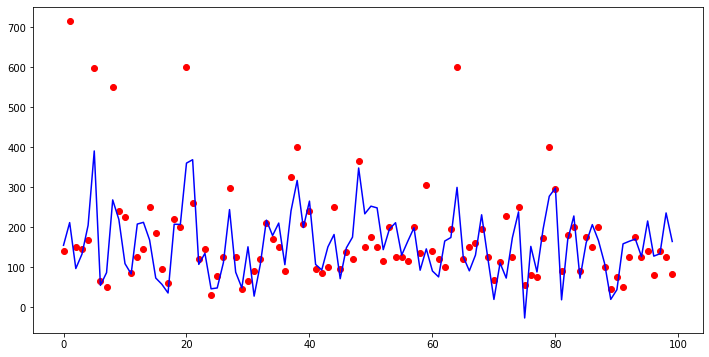

In [ ]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)
plt.scatter(x_test.reset_index().head(100).index, y_test.head(100), color='red')
plt.plot(x_test.reset_index().head(100).index,y_pred[0:100],color = 'blue' )
plt.show()

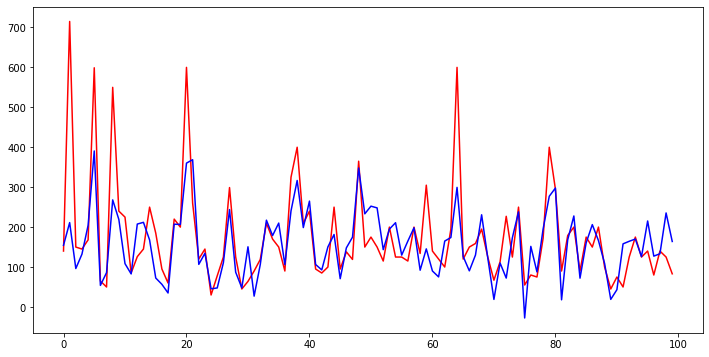

In [ ]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)
plt.plot(x_test.reset_index().head(100).index, y_test.head(100), color='red')
plt.plot(x_test.reset_index().head(100).index,y_pred[0:100],color = 'blue' )
plt.show()